In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
shop=pd.read_csv('/content/drive/My Drive/online_shoppers_intention.csv')
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The dataset contains information related to customer visits to a website and the time they spend on the website. We are trying to classify whether or not the customer will buy something.

In [ ]:
shop.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


There are no missing values

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We see that there are 18 columns of which 14 are numerical, 2 are categorical and 2 are boolean.

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
shop['Month']=l.fit_transform(shop['Month'])
shop['VisitorType'] = l.fit_transform(shop['VisitorType'])

In [ ]:
shop['Weekend'] = shop['Weekend'].astype(int)
shop['Revenue'] = shop['Revenue'].astype(int)

In [ ]:
shop.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [ ]:
print(shop['Revenue'].value_counts(normalize=True))

Revenue
0    0.845255
1    0.154745
Name: proportion, dtype: float64


This shows that only 15% of the sessions resulted in a purchase while 85% ended up not purchasing anything. There is a clear imbalance.

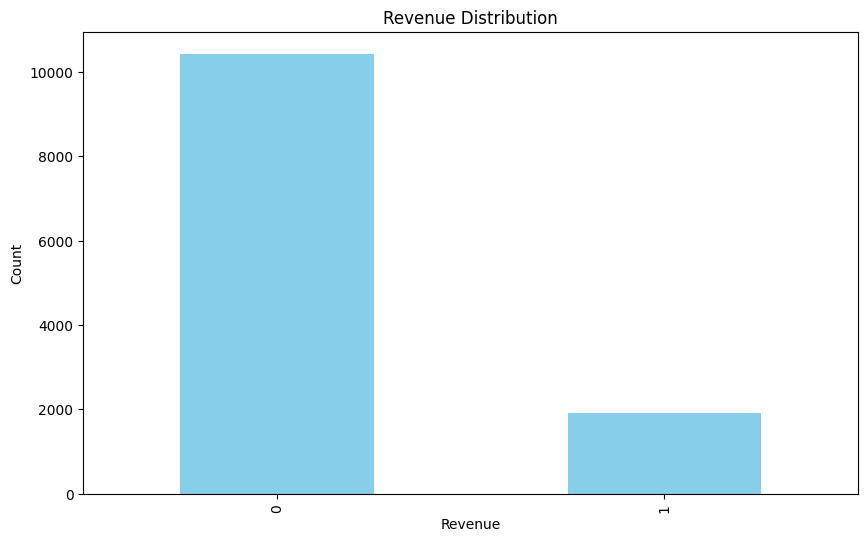

In [ ]:
plt.figure(figsize=(10, 6))
shop['Revenue'].value_counts().plot(kind='bar', color='skyblue')

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue Distribution')
plt.show()

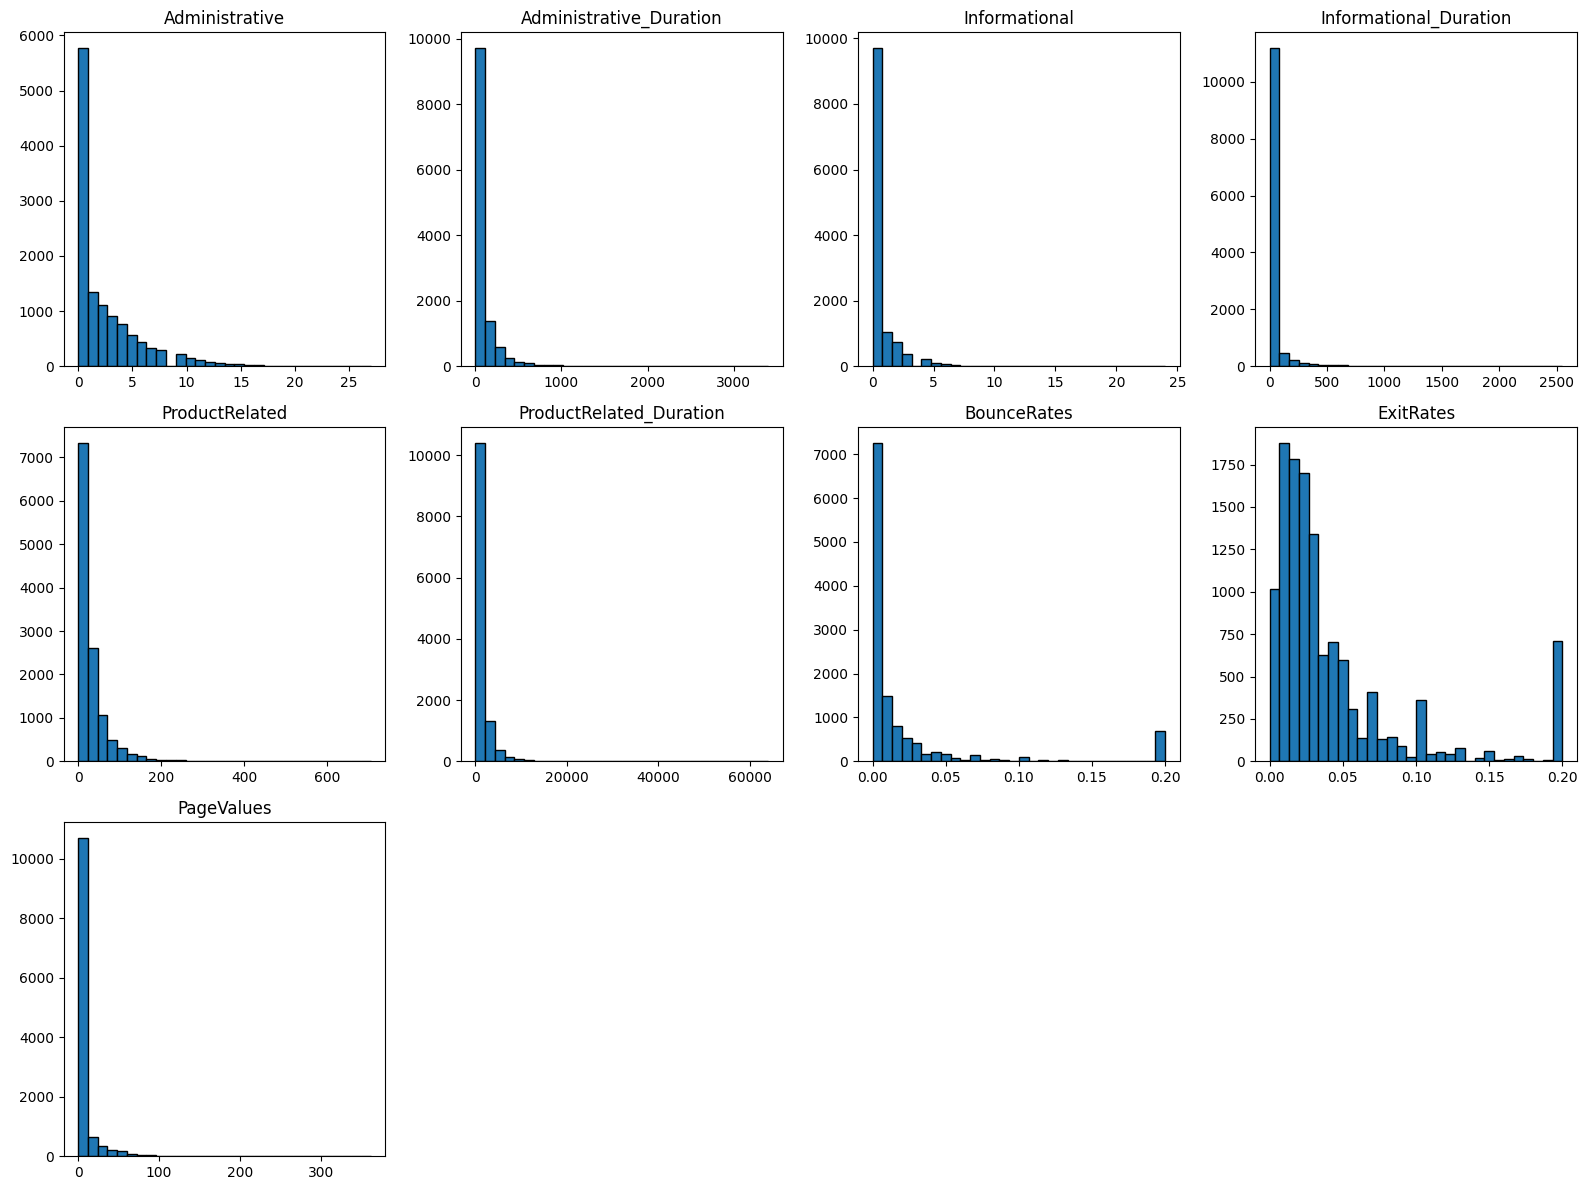

In [ ]:
imp_cols = [
    "Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"
]

num_plots = len(imp_cols)
n_cols = 4
n_rows = int(np.ceil(num_plots / n_cols))

plt.figure(figsize=(4 * n_cols, 4 * n_rows))
for i, col in enumerate(imp_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(shop[col].dropna(), bins=30, edgecolor="black")
    plt.title(col)

plt.tight_layout()
plt.show()

The data is heavily skewed so we need to normalize. Since there is skewnessits highly likely that the data has outliers. we will plot it to check.

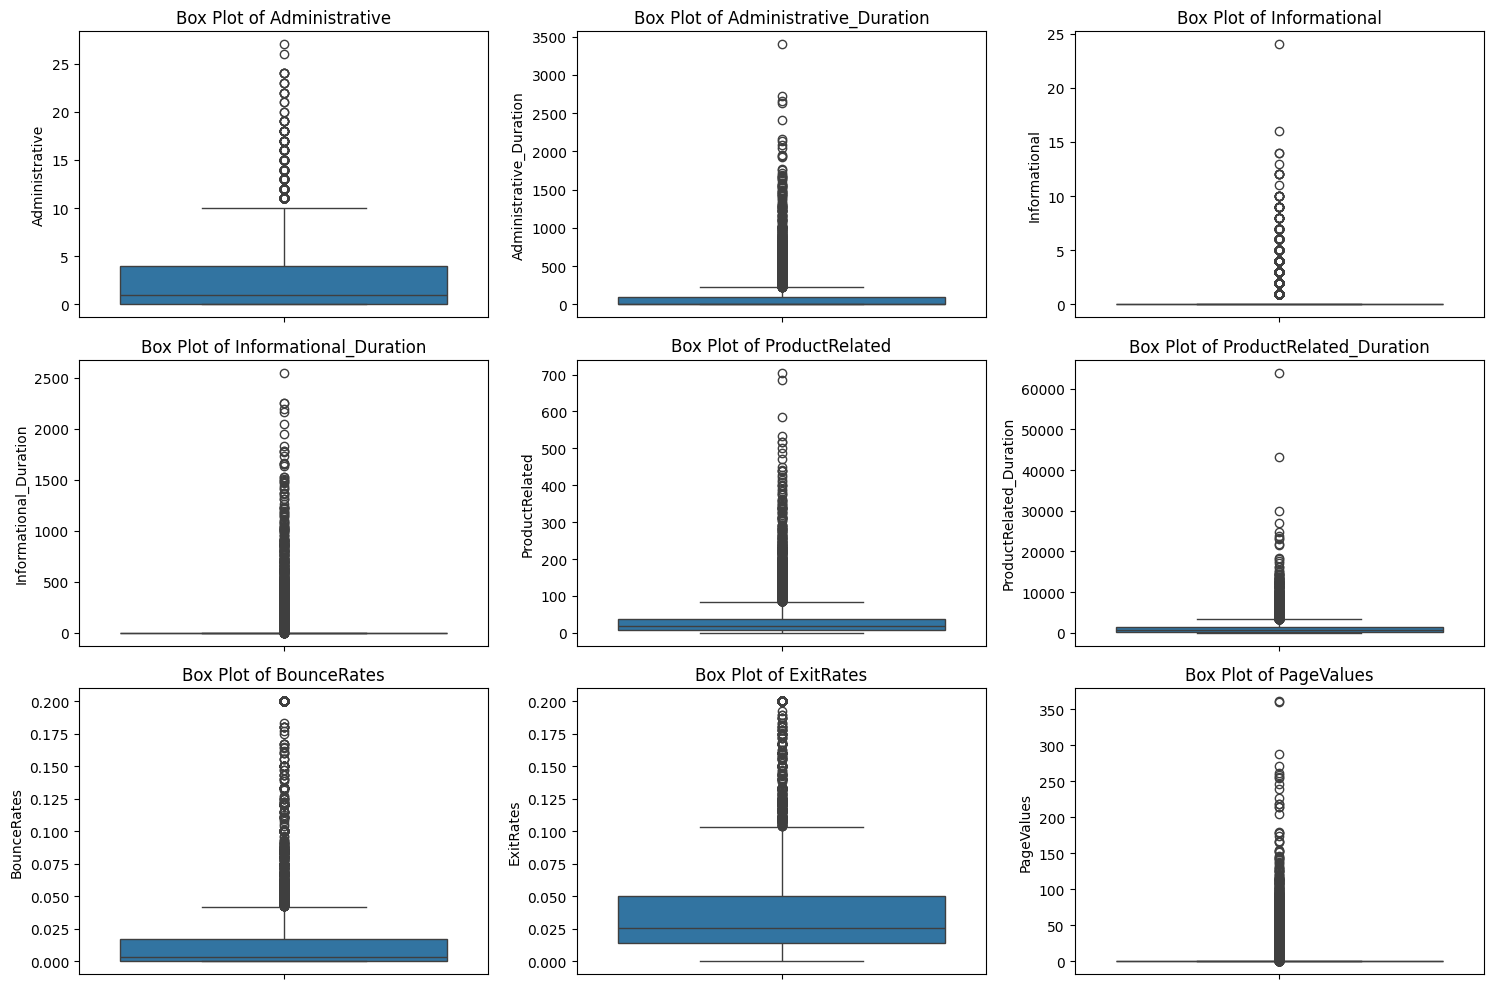

In [ ]:
num_cols = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=shop[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

Lets try plotting with raw data to get a basic accuracy.

Text(0.5, 1.0, 'Correlation')

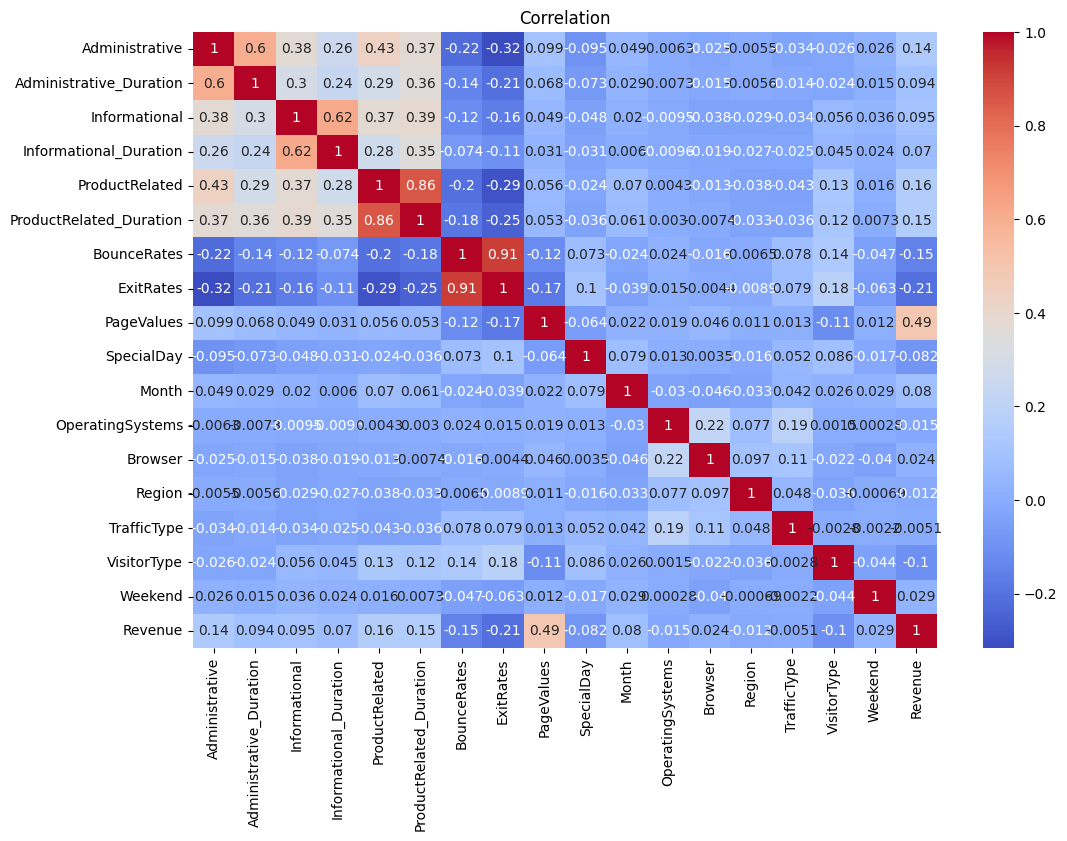

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(shop.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation')

Positive correlation:
Bounce rates and exit rates are highly correlated showing user disengagement.
ProductRelated and Product Product related duration are highly correlated which means that the user who spends more time on product pages tend to spend more time. Page value has high correlation with revenue and higher pagevalue means higher chance of revenue.
Negative correlation:
bounce rates and exit rates have negative correlation with product related and product related duration which suggests that the more time a person spend on a product, its likely that they will end up purchasing.

Here we can conclude that page values, exit rate and bounce rates are our key predictors.

In [ ]:
# Define features and target
X = shop[['PageValues', 'ExitRates', 'ProductRelated_Duration',
          'Administrative_Duration', 'Informational_Duration',
          'Month', 'SpecialDay', 'VisitorType', 'Weekend', 'TrafficType']]

y = shop['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
#LOGISTIC REGRESSION on Raw data:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr=LogisticRegression()
log_model= lr.fit(X_train,y_train)
log_pred=log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")

print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.8808
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2089
           1       0.72      0.36      0.48       377

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model shows high accuracy but low F1 score on class 1 indicates that it is not well represented and the modle is biased.

In [ ]:
#KNN on Raw data:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test,knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test,knn_pred))

KNN Accuracy: 0.8710
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2089
           1       0.66      0.32      0.43       377

    accuracy                           0.87      2466
   macro avg       0.77      0.65      0.68      2466
weighted avg       0.85      0.87      0.85      2466



Here we see the same issue of revenue column imbalance.

In [ ]:
#NaiveBayes on Raw data:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test,nb_pred)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")
print(classification_report(y_test,nb_pred))

Naïve Bayes Accuracy: 0.8650
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2089
           1       0.58      0.44      0.50       377

    accuracy                           0.86      2466
   macro avg       0.74      0.69      0.71      2466
weighted avg       0.85      0.86      0.86      2466



In [ ]:
#DecisionTree on Raw Data
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)


dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.8581
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2089
           1       0.53      0.55      0.54       377

    accuracy                           0.86      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



In [ ]:
#SVM on Raw data:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8504
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2089
           1       1.00      0.02      0.04       377

    accuracy                           0.85      2466
   macro avg       0.92      0.51      0.48      2466
weighted avg       0.87      0.85      0.78      2466



The zero f1 score suggests that the model completely failed to predict the class 1.

In [ ]:
#Random Forest on Raw Data:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)

rfm_pred = rfm.predict(X_test)

rf_accuracy = accuracy_score(y_test, rfm_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rfm_pred))

Random Forest Accuracy: 0.8909
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2089
           1       0.69      0.53      0.60       377

    accuracy                           0.89      2466
   macro avg       0.80      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



Good overall score but the minority class representaion can be improved.

We got the best f1 score for Class 1 using Random Forest and the worst for SVM which completely failed.
So lets conclude that all the models perform very well on class 0 and not so well with class 1, due to imbalance.

Lets move onto preprocessing the data to build the best model since most of the models shows poor prediction on the minority class.

From the data distribution, we understand that the data is right skewed and a technique like standard scalar or minmax scalar would not be appropriate to use. Hence we will use a Robust Scalar.

Preprocessing:

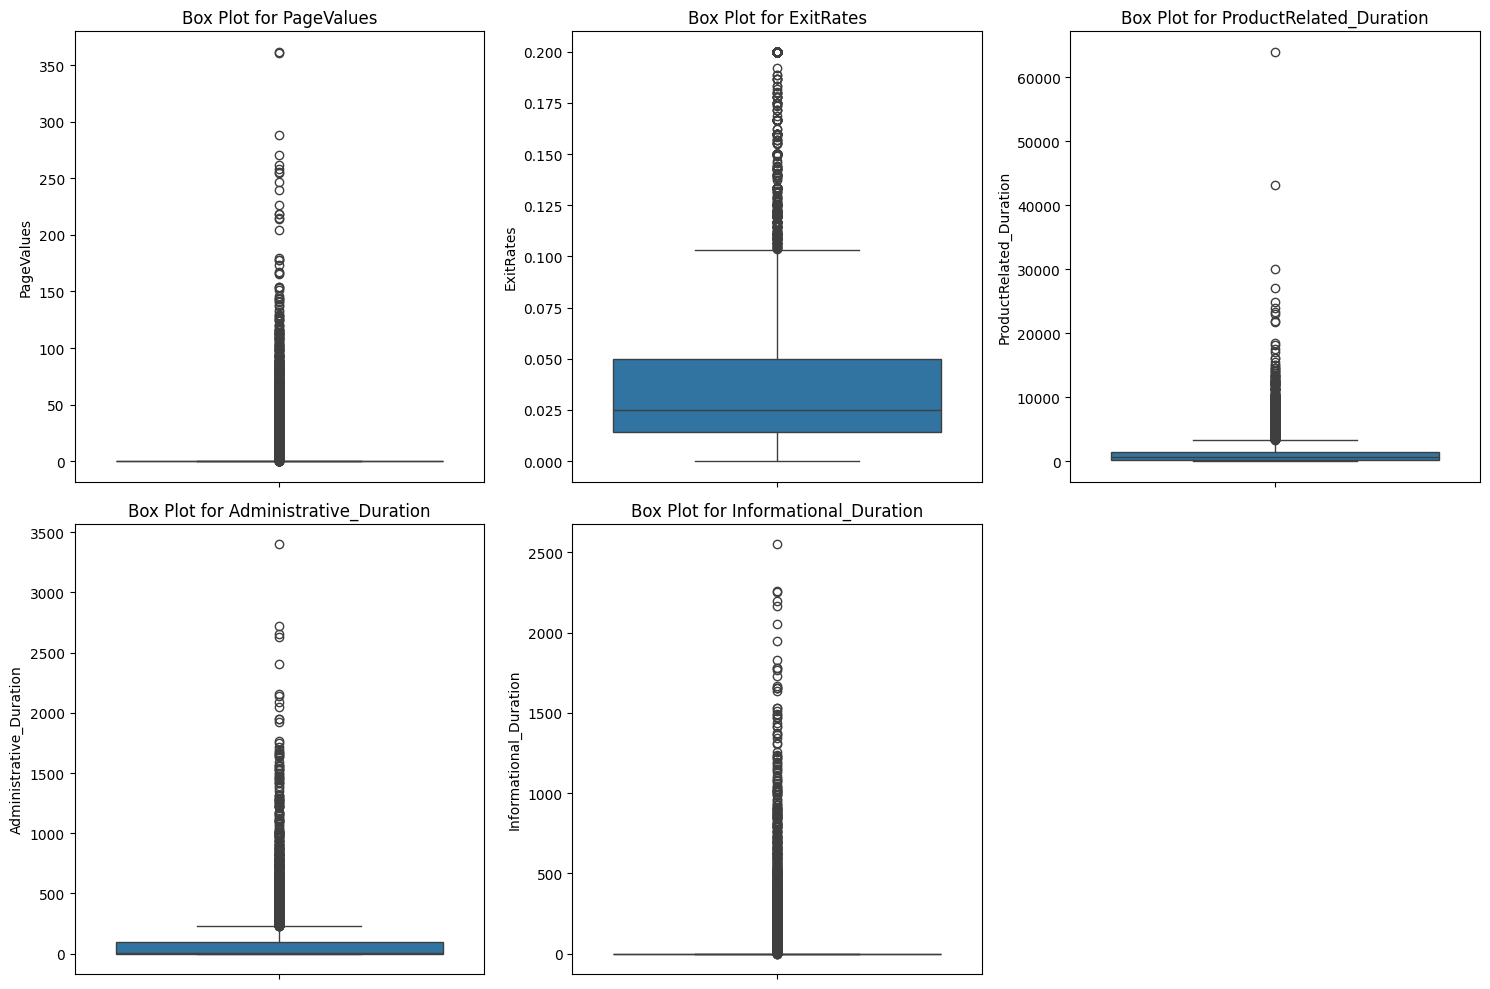

In [ ]:
num_cols = [
    'PageValues',
    'ExitRates',
    'ProductRelated_Duration',
    'Administrative_Duration',
    'Informational_Duration'
]

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(5 * n_cols, 5 * n_rows))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=shop[col])
    plt.title(f"Box Plot for {col}")

plt.tight_layout()
plt.show()

In [ ]:
shopn = X.copy()


shopn['PageValues_NonZero'] = (shopn['PageValues'] > 0).astype(int)
shopn['Informational_Duration_NonZero'] = (shopn['Informational_Duration'] > 0).astype(int)

print("Proportion of non-zero PageValues:", shopn['PageValues_NonZero'].mean())
print("Proportion of non-zero Informational_Duration:", shopn['Informational_Duration_NonZero'].mean())

Proportion of non-zero PageValues: 0.22141119221411193
Proportion of non-zero Informational_Duration: 0.19505271695052717


There is a significant concentration of zero which caused the above boxplot collapse. since page values have high correlation with revenue, its likely that this is indicative of purchase intent.

Shape after capping outliers: (12330, 10)


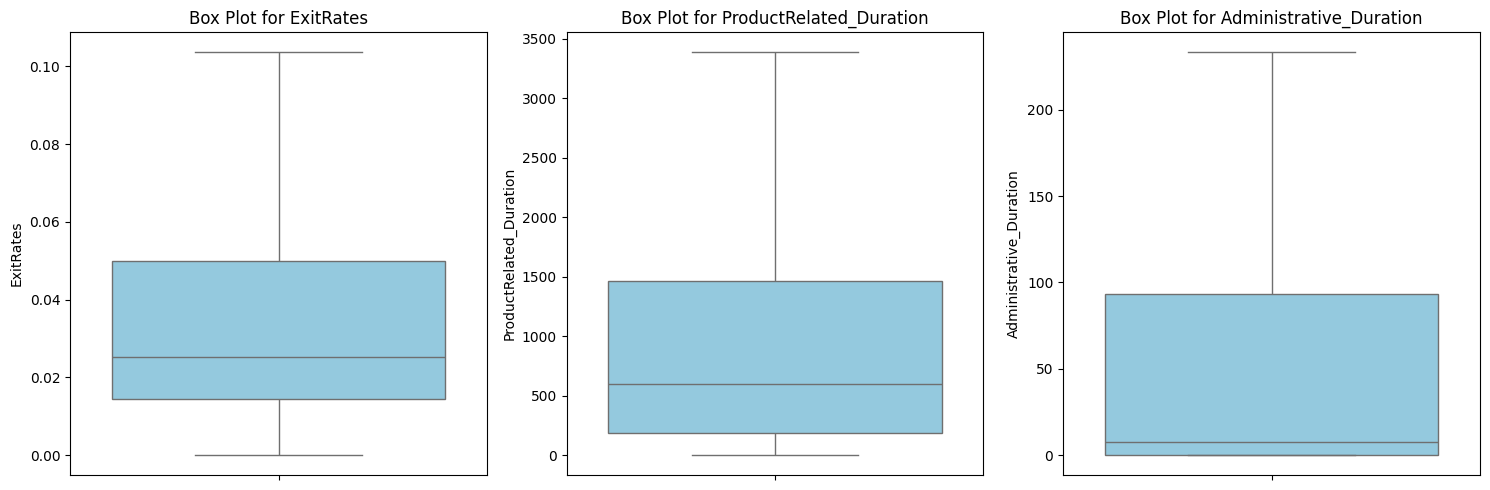

In [ ]:
shopn = X.copy()

numerical_cols = [
    'ExitRates',
    'ProductRelated_Duration',
    'Administrative_Duration'
]

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

shop_cap = shopn.copy()
for col in numerical_cols:
    shop_cap = cap_outliers(shop_cap, col)

print(f"Shape after capping outliers: {shop_cap.shape}")

n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(5 * n_cols, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=shop_cap[col], color="skyblue")
    plt.title(f"Box Plot for {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
shopn['PageValues_log'] = np.log1p(shopn['PageValues'])
shopn['Informational_Duration_log'] = np.log1p(shopn['Informational_Duration'])

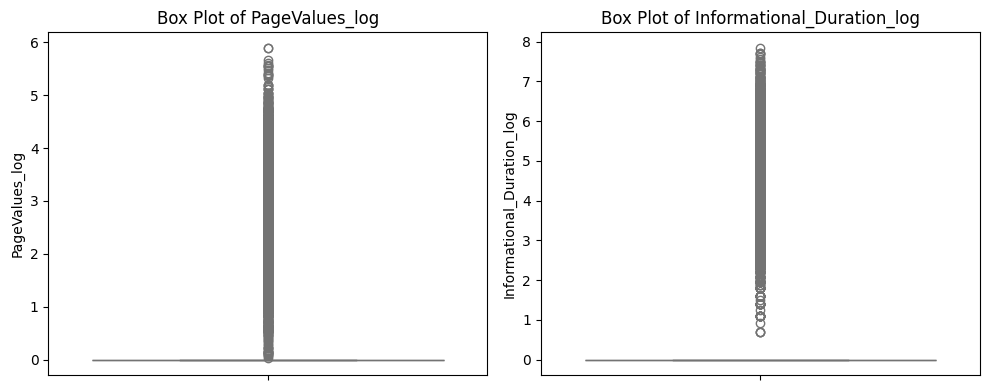

In [ ]:
log_cols = ['PageValues_log', 'Informational_Duration_log']

plt.figure(figsize=(10, 4))
for i, col in enumerate(log_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=shopn[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

We have used log and binary techniques to handle the outliers. On comparison with the previous unprocessed data, this data is much more clean and ready for model building even though there are some outliers. We will also be using robust scalar to ensure the data performs well.

In [ ]:
from sklearn.preprocessing import RobustScaler

features_to_scale = [
    'ExitRates',
    'ProductRelated_Duration',
    'Administrative_Duration',
    'PageValues_log',
    'Informational_Duration_log'
]

scaler = RobustScaler()
shopn_scaled = shopn.copy()

shopn_scaled[features_to_scale] = scaler.fit_transform(shopn_scaled[features_to_scale])

In [ ]:
Xn = shopn_scaled.copy()
yn = shop['Revenue']

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=10, stratify=yn)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
Xb, yb = smote.fit_resample(Xn_train, yn_train)

Lets try training the models on this processed data:

In [ ]:
#LOGISTIC REGRESSION on processed data:
log_model2 = LogisticRegression(random_state=10)
log_model2.fit(Xb, yb)

log_pred2 = log_model2.predict(Xn_test)

log_accuracy2 = accuracy_score(yn_test, log_pred2)
print(f"Logistic Regression Accuracy: {log_accuracy2:.4f}")
print(classification_report(yn_test, log_pred2))

Logistic Regression Accuracy: 0.8719
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2084
           1       0.56      0.81      0.66       382

    accuracy                           0.87      2466
   macro avg       0.76      0.85      0.79      2466
weighted avg       0.90      0.87      0.88      2466



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train KNN on processed data:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(Xb, yb)

knn_pred2 = knn2.predict(Xn_test)

knn_accuracy2 = accuracy_score(yn_test, knn_pred2)
print(f"KNN Accuracy: {knn_accuracy2:.4f}")
print(classification_report(yn_test, knn_pred2))

KNN Accuracy: 0.8240
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2084
           1       0.46      0.77      0.58       382

    accuracy                           0.82      2466
   macro avg       0.71      0.80      0.73      2466
weighted avg       0.88      0.82      0.84      2466



In [ ]:
#Train Naive Bayes on processed data
nb_model2 = GaussianNB()
nb_model2.fit(Xb, yb)

nb_pred2 = nb_model2.predict(Xn_test)

nb_accuracy2 = accuracy_score(yn_test, nb_pred2)
print(f"Naïve Bayes Accuracy: {nb_accuracy2:.4f}")
print(classification_report(yn_test, nb_pred2))

Naïve Bayes Accuracy: 0.8564
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2084
           1       0.53      0.77      0.62       382

    accuracy                           0.86      2466
   macro avg       0.74      0.82      0.77      2466
weighted avg       0.89      0.86      0.87      2466



In [ ]:
# Train Decision Tree on processed data
dt2 = DecisionTreeClassifier(random_state=10)
dt2.fit(Xb, yb)

dt_pred2 = dt2.predict(Xn_test)

dt_accuracy2 = accuracy_score(yn_test, dt_pred2)
print(f"Decision Tree Accuracy: {dt_accuracy2:.4f}")
print(classification_report(yn_test, dt_pred2))

Decision Tree Accuracy: 0.8390
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2084
           1       0.49      0.66      0.56       382

    accuracy                           0.84      2466
   macro avg       0.71      0.77      0.73      2466
weighted avg       0.86      0.84      0.85      2466



In [ ]:
# Train SVM on processed data
svm_model2 = SVC(random_state=10)
svm_model2.fit(Xb, yb)

svm_pred2 = svm_model2.predict(Xn_test)

svm_accuracy2 = accuracy_score(yn_test, svm_pred2)
print(f"SVM Accuracy: {svm_accuracy2:.4f}")
print(classification_report(yn_test, svm_pred2))

SVM Accuracy: 0.8690
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2084
           1       0.56      0.73      0.63       382

    accuracy                           0.87      2466
   macro avg       0.75      0.81      0.78      2466
weighted avg       0.89      0.87      0.88      2466



SVM model has improved much better on processed data.

In [ ]:
# Train Random Forest on processed data
rfm2 = RandomForestClassifier(random_state=10)
rfm2.fit(Xb, yb)

rfm_pred2 = rfm2.predict(Xn_test)

rf_accuracy2 = accuracy_score(yn_test, rfm_pred2)
print(f"Random Forest Accuracy: {rf_accuracy2:.4f}")
print(classification_report(yn_test, rfm_pred2))

Random Forest Accuracy: 0.8739
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2084
           1       0.57      0.77      0.66       382

    accuracy                           0.87      2466
   macro avg       0.76      0.83      0.79      2466
weighted avg       0.90      0.87      0.88      2466



Since Random Forest has the best accuracy so far, we will use hyper paramter tuning on this model to improve it.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=10)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

grid_search.fit(Xb, yb)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
rfm_pred_best = best_rf.predict(Xn_test)

rfm_accuracy_best = accuracy_score(yn_test, rfm_pred_best)
print(f"Best Random Forest Accuracy: {rfm_accuracy_best:.4f}")
print(classification_report(yn_test, rfm_pred_best))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.8763
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2084
           1       0.57      0.78      0.66       382

    accuracy                           0.88      2466
   macro avg       0.77      0.84      0.79      2466
weighted avg       0.90      0.88      0.88      2466



Since its clear that ensemble models are best for this dataset, we try xgboost.

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=10
)

xgb_model.fit(Xn_train, yn_train)

xgb_pred = xgb_model.predict(Xn_test)

xgb_accuracy = accuracy_score(yn_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(yn_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:37:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9047
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.73      0.61      0.67       382

    accuracy                           0.90      2466
   macro avg       0.83      0.79      0.81      2466
weighted avg       0.90      0.90      0.90      2466



XG Boost has the highest accuracy so far and hence tha is the best suit for this project.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=10
)

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'scale_pos_weight': [1, 2, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=10
)

random_search.fit(Xn_train, yn_train)

best_xgb = random_search.best_estimator_

xgb_pred_best = best_xgb.predict(Xn_test)
xgb_accuracy_best = accuracy_score(yn_test, xgb_pred_best)

print("Best Parameters:", random_search.best_params_)
print(f"XGBoost Accuracy (Randomized Search): {xgb_accuracy_best:.4f}")
print(classification_report(yn_test, xgb_pred_best))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:48:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': np.float64(0.7674389936592543), 'learning_rate': np.float64(0.049612572951924803), 'max_depth': 3, 'n_estimators': 173, 'scale_pos_weight': 1, 'subsample': np.float64(0.7790808538086856)}
XGBoost Accuracy (Randomized Search): 0.9079
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2084
           1       0.74      0.62      0.68       382

    accuracy                           0.91      2466
   macro avg       0.84      0.79      0.81      2466
weighted avg       0.90      0.91      0.90      2466



Accuracy has improved and recall means the model catches 62% of actual buyers which is not bad given class imbalance.
Precision indicates a good portion of predicted buyers actually did buy.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_results = {}

def evaluate_model(name, y_true, y_pred):
    model_results[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

evaluate_model('Logistic Regression', yn_test, log_pred2)
evaluate_model('KNN', yn_test, knn_pred2)
evaluate_model('Naive Bayes', yn_test, nb_pred2)
evaluate_model('Decision Tree', yn_test, dt_pred2)
evaluate_model('SVM', yn_test, svm_pred2)
evaluate_model('Random Forest', yn_test, rfm_pred2)
evaluate_model('XGBoost', yn_test, xgb_pred)
evaluate_model('XGBoost (Tuned)', yn_test, best_xgb.predict(Xn_test))

summary = pd.DataFrame(model_results).T
summary = summary.round(4)
summary.sort_values(by='F1 Score', ascending=False, inplace=True)

summary

,Accuracy,Precision,Recall,F1 Score
XGBoost (Tuned),0.9079,0.7445,0.6178,0.6753
XGBoost,0.9047,0.7290,0.6126,0.6657
Logistic Regression,0.8719,0.5594,0.8141,0.6631
Random Forest,0.8739,0.5681,0.7749,0.6556
SVM,0.8690,0.5589,0.7330,0.6342
Naive Bayes,0.8564,0.5251,0.7670,0.6234
KNN,0.8240,0.4596,0.7749,0.5770
Decision Tree,0.8390,0.4857,0.6649,0.5613


Here on comparing the scores of all the models so far, we see that xgboost is the best option. Lets also compare the results with the accuracy scores we got for the unprocessed data.

In [ ]:
model_resultsr = {}

def evaluate_model(name, y_true, y_pred):
    model_resultsr[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

evaluate_model('Logistic Regression', y_test, log_pred)
evaluate_model('KNN', y_test, knn_pred)
evaluate_model('Naive Bayes', y_test, nb_pred)
evaluate_model('Decision Tree', y_test, dt_pred)
evaluate_model('SVM', y_test, svm_pred)
evaluate_model('Random Forest', y_test, rfm_pred)

summaryr = pd.DataFrame(model_resultsr).T
summaryr = summaryr.round(4)
summaryr.sort_values(by='F1 Score', ascending=False, inplace=True)

summaryr

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.8909,0.6875,0.5252,0.5955
Decision Tree,0.8581,0.5347,0.5517,0.5431
Naive Bayes,0.8650,0.5759,0.4430,0.5007
Logistic Regression,0.8808,0.7173,0.3634,0.4824
KNN,0.8710,0.6595,0.3236,0.4342
SVM,0.8504,1.0000,0.0212,0.0416


Comparing the models build before processing the data and after processing, we can conclude that most models improved in f1 score.
Random Forest and Logistic Regression benefited from data balancing and scaling.
SVM performed poorly on raw data — likely due to unscaled feature space.

lets perform cross validation to ensure that xgboost is performing well on unseen data

In [ ]:
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(
    n_estimators=173,
    max_depth=3,
    learning_rate=0.0496,
    subsample=0.7791,
    colsample_bytree=0.7674,
    scale_pos_weight=1,
    eval_metric='logloss',
    random_state=10
)

f1_scores = cross_val_score(xgb, Xb, yb, cv=5, scoring='f1')

print("F1 Scores from 5-Fold CV:", f1_scores)
print("Average F1 Score:", f1_scores.mean())

F1 Scores from 5-Fold CV: [0.83481459 0.87432351 0.88961814 0.86783487 0.87916667]
Average F1 Score: 0.8691515544909576


This f1 score indicates that there is consistency within the scores which confirms that this is a good model to train for this dataset.